In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange, interp1d

%matplotlib inline

# 1-d interpolation

## Linear i-d interpolation

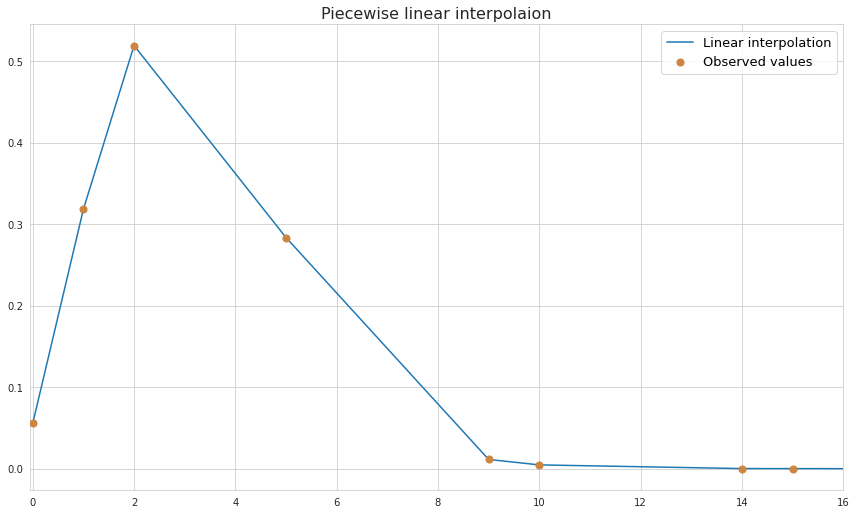

In [240]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 7))

def func(x):
    new_array = (x+0.2)/(0.1*np.exp(x)+3.5)
    return new_array

#x = np.linspace(0, 11, 10)
x = np.array([0, 1, 2, 5, 9, 10, 14, 15]) 
x_ = np.array([0, 1, 2, 5, 9, 10, 14, 16]) # technical array for plotting outside the know range
x2 = np.linspace(0, 16, 1100) # technical array for plotting continuous functions
y = func(x) # observed values at known datapoints

ax.scatter(x, y, s=50, color='peru', zorder=20, label='Observed values') # known data points
ax.plot(x_, func(x_), label='Linear interpolation') # linear interpolation
ax.set_xlim(-0.05, 16)
plt.tight_layout()
plt.legend(fontsize=13)
plt.title('Piecewise linear interpolaion', fontsize=16)
plt.savefig('../../assets/images/regression/interpolation_linear.png', bbox_inches='tight');

## Polynomial i-d interpolation

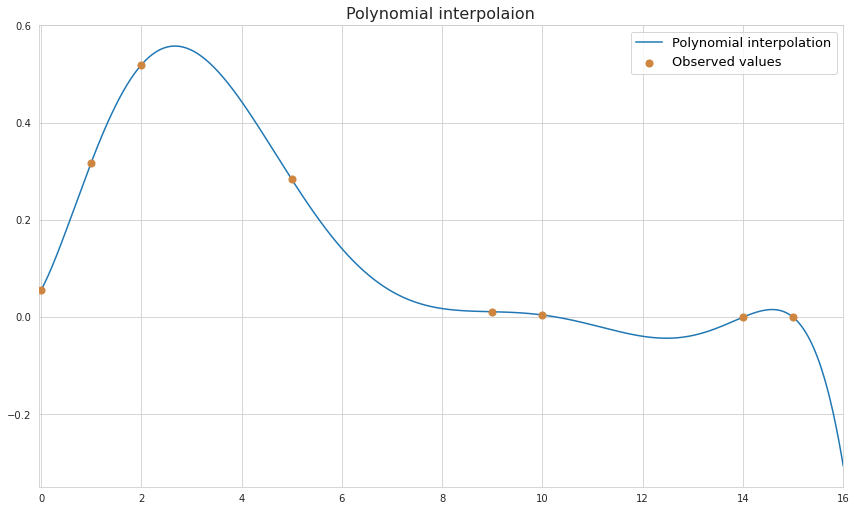

In [246]:
poly = lagrange(x, y) # find coefficients for Lagrange polynomial using known points 
y2 = poly(x2) # values obtained with the fitted function 

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(x, y, s=50, color='peru', zorder=20, label='Observed values') # known data points
ax.plot(x2, y2, label='Polynomial interpolation') # Lagrange polynomial interpolation
ax.set_xlim(-0.05, 16)
plt.tight_layout()
plt.legend(fontsize=13)
plt.title('Polynomial interpolaion', fontsize=16)
plt.savefig('../../assets/images/regression/interpolation_polynomial.png', bbox_inches='tight');

## Spline

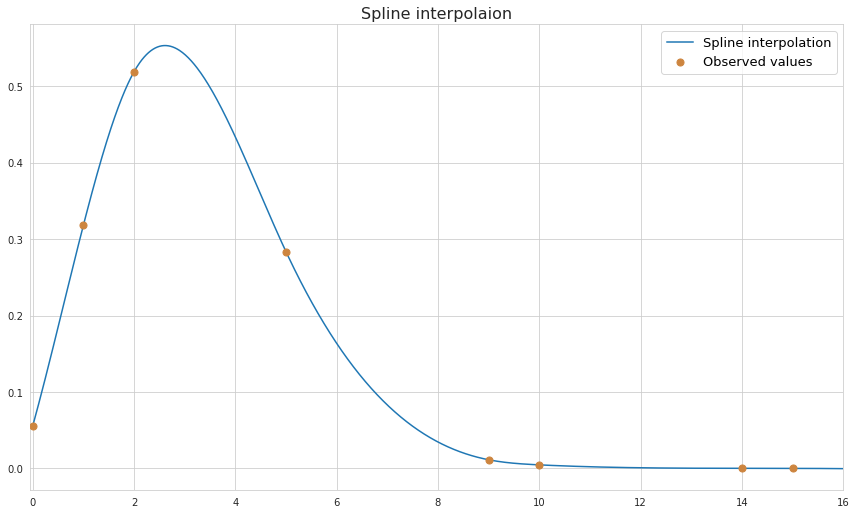

In [247]:
spline2 = interp1d(x, y, kind=3, fill_value='extrapolate') # spline of second order
y_spline2 = spline2(x2) # values obtained with the fitted function 

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(x, y, s=50, color='peru', zorder=20, label='Observed values') # known data points
ax.plot(x2, y_spline2, label='Spline interpolation') # Lagrange polynomial
ax.set_xlim(-0.05, 16)
plt.tight_layout()
plt.legend(fontsize=13)
plt.title('Spline interpolaion', fontsize=16)
plt.savefig('../../assets/images/regression/interpolation_spline.png', bbox_inches='tight');